In [555]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA, FastICA, NMF
from sklearn import random_projection
from scipy.stats import kurtosis
import seaborn as sns
import matplotlib.pyplot as plt


In [556]:

k_value = 10
digits = load_digits()
X = digits.data
y = digits.target
'''
data_location = './pima-indians-diabetes.data'
header = ['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 
        'insulin', 'bmi', 'diabetepedigree', 'age', 'outcome']

df = pd.read_csv(data_location, names=header)

X = np.array(df.drop(['outcome'], 1).astype(float))
y = np.array(df['outcome'])
'''

"\ndata_location = './pima-indians-diabetes.data'\nheader = ['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', \n        'insulin', 'bmi', 'diabetepedigree', 'age', 'outcome']\n\ndf = pd.read_csv(data_location, names=header)\n\nX = np.array(df.drop(['outcome'], 1).astype(float))\ny = np.array(df['outcome'])\n"

In [557]:
'''
print(X.shape)
print(X.min(axis=0))
print(X.max(axis=0))
print(X.mean(axis=0))
print(np.median(X, axis=0))
print(kurtosis(X))

'''


'\nprint(X.shape)\nprint(X.min(axis=0))\nprint(X.max(axis=0))\nprint(X.mean(axis=0))\nprint(np.median(X, axis=0))\nprint(kurtosis(X))\n\n'

In [558]:
'''
pca = PCA(n_components=10,svd_solver='full')
X = pca.fit_transform(X)
''' 
'''
print(X.shape)
print(X.min())
print(X.max())
print(X.mean())
print(np.median(X))
print(kurtosis(X).mean())

print(kurtosis(X))
'''


'\nprint(X.shape)\nprint(X.min())\nprint(X.max())\nprint(X.mean())\nprint(np.median(X))\nprint(kurtosis(X).mean())\n\nprint(kurtosis(X))\n'

In [561]:

gmm = GaussianMixture(n_components=k_value,
                            covariance_type='full',
                            max_iter=600,
                            n_init=1).fit(X)

clusters = gmm.predict(X)
gmm.cluster_centers_.shape


'''
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(X)
'''
#(10,64)
    

AttributeError: 'GaussianMixture' object has no attribute 'cluster_centers_'

In [552]:
'''
fig, ax = plt.subplots(1, 2)
centers = kmeans.cluster_centers_.reshape(2, 1, ) #640
titles = ['No Diabetes','Diabetes']
print(centers)
for axi, center,title in zip(ax.flat, centers, titles):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
    axi.set_title(str(title))
    
    '''

"\nfig, ax = plt.subplots(1, 2)\ncenters = kmeans.cluster_centers_.reshape(2, 1, ) #640\ntitles = ['No Diabetes','Diabetes']\nprint(centers)\nfor axi, center,title in zip(ax.flat, centers, titles):\n    axi.set(xticks=[], yticks=[])\n    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)\n    axi.set_title(str(title))\n    \n    "

ValueError: cannot reshape array of size 100 into shape (10,8,8)

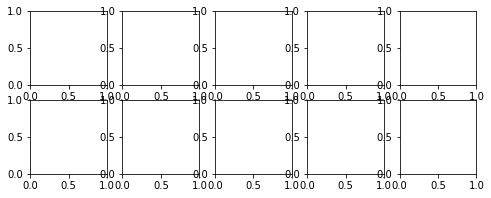

In [554]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
    